In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import mixture
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
views = df["#views"].to_numpy()

In [4]:
views

array([2403572., 1421234., 1460690., ..., 1545014.,  244363., 1662561.])

In [5]:
import matplotlib.pyplot as plt

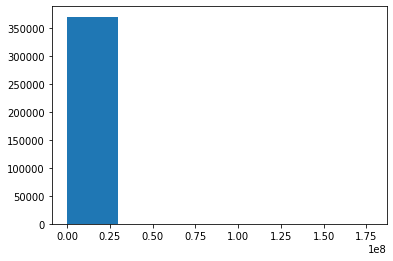

In [10]:
plt.hist(views, bins=6)
plt.show()

In [38]:
df_testing = pd.read_csv("data/test_without_truth.csv")
df_training = pd.read_csv("data/all_features.csv")

## Data Analysis

In [9]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359274 entries, 0 to 359273
Data columns (total 42 columns):
Unnamed: 0               359274 non-null int64
Unnamed: 0.1             359274 non-null int64
post_id                  359274 non-null int64
user_id                  359274 non-null int64
country                  359274 non-null int64
category                 359274 non-null object
#views                   359274 non-null float64
#comments                359274 non-null float64
#likes                   359274 non-null int64
norm_views               359274 non-null float64
norm_comments            359274 non-null float64
norm_likes               359274 non-null float64
cat1                     359274 non-null float64
cat2                     359274 non-null float64
cat3                     359274 non-null float64
cat4                     359274 non-null float64
cat5                     359274 non-null float64
cat6                     359274 non-null float64
cat7                

In [3]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158541 entries, 0 to 158540
Data columns (total 6 columns):
post_id      158541 non-null int64
user_id      158541 non-null int64
country      158541 non-null int64
category     158541 non-null object
#views       158527 non-null float64
#comments    153990 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 7.3+ MB


In [39]:
df_testing.isna().sum()

post_id         0
user_id         0
country         0
category        0
#views         14
#comments    4551
dtype: int64

In [4]:
df_testing.head()

,post_id,user_id,country,category,#views,#comments
0,54149,539,13,gaming,5162733.0,41547.0
1,169258,24278,13,gaming,2645253.0,21437.0
2,236048,32636,13,gaming,1037161.0,8775.0
3,50631,20906,13,gaming,1061029.0,6544.0
4,53051,526,13,gaming,526061.0,610.0


In [5]:
print("user_id" ,len(df_testing.user_id.unique()))
print("country", len(df_testing.country.unique()))
print("category", len(df_testing.category.unique()))

user_id 28749
country 15
category 9


## Normalisation of Data

In [11]:
views = df_training['#views'].to_numpy()
comments = df_training['#comments'].to_numpy()

max_views, min_views = max(views), min(views)
max_comments, min_comments = max(comments), min(comments)

In [12]:
def normalise_views(num):
    return float(num - min_views)/float(max_views - min_views)

def normalise_comments(num):
    return float(num - min_comments)/float(max_comments - min_comments)

In [30]:
category_list = list(df_training.category.unique())
category_encoding = {}
for category in category_list:
    df1 = df_training[df_training["category"] == category]
    df1 = df1.reset_index().loc[0]
    a1 = df1[["cat1"]].iloc[0]
    a2 = df1[["cat2"]].iloc[0]
    a3 = df1[["cat3"]].iloc[0]
    a4 = df1[["cat4"]].iloc[0]
    a5 = df1[["cat5"]].iloc[0]
    a6 = df1[["cat6"]].iloc[0]
    a7 = df1[["cat7"]].iloc[0]
    a8 = df1[["cat8"]].iloc[0]
    a9 = df1[["cat9"]].iloc[0]
    category_encoding[category] = [a1, a2, a3, a4, a5, a6, a7, a8, a9]

In [31]:
category_encoding

{'gaming': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'sports': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'entertainment': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'automotive': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'music': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 'animals': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'comedy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'howTo': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'technology': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]}

In [32]:
country_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

def get_country_enc(country):
    one_hot = np.zeros((len(country_list)), dtype = int)
    one_hot[int(country)] = 1
    return one_hot

country_encoding = {}
for country in country_list:
    country_encoding[country] = get_country_enc(country)

In [33]:
country_encoding

{0: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 1: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 2: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 3: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 4: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 5: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 6: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 7: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 8: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 9: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 12: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [34]:
for i in range(df_testing.shape[0]):
    df_testing.at[i, "norm_views"] = normalise_views(df_testing[["#views"]].iloc[i].values[0])
    df_testing.at[i, "norm_comments"] = normalise_comments(df_testing[["#comments"]].iloc[i].values[0])
    
    category_val = category_encoding[df_testing[["category"]].iloc[i].values[0]]
    df_testing.at[i, "cat1"] = category_val[0]
    df_testing.at[i, "cat2"] = category_val[1]
    df_testing.at[i, "cat3"] = category_val[2]
    df_testing.at[i, "cat4"] = category_val[3]
    df_testing.at[i, "cat5"] = category_val[4]
    df_testing.at[i, "cat6"] = category_val[5]
    df_testing.at[i, "cat7"] = category_val[6]
    df_testing.at[i, "cat8"] = category_val[7]
    df_testing.at[i, "cat9"] = category_val[8]
    
    country_val = country_encoding[df_testing[["country"]].iloc[i].values[0]]
    df_testing.at[i, "count1"] = country_val[0]
    df_testing.at[i, "count2"] = country_val[1]
    df_testing.at[i, "count3"] = country_val[2]
    df_testing.at[i, "count4"] = country_val[3]
    df_testing.at[i, "count5"] = country_val[4]
    df_testing.at[i, "count6"] = country_val[5]
    df_testing.at[i, "count7"] = country_val[6]
    df_testing.at[i, "count8"] = country_val[7]
    df_testing.at[i, "count9"] = country_val[8]
    df_testing.at[i, "count10"] = country_val[9]
    df_testing.at[i, "count11"] = country_val[10]
    df_testing.at[i, "count12"] = country_val[11]
    df_testing.at[i, "count13"] = country_val[12]
    df_testing.at[i, "count14"] = country_val[13]
    df_testing.at[i, "count15"] = country_val[14]
    
    if i%5000 == 0: print(i)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000


In [35]:
df_testing.to_csv("data/testing_data_normalise.csv")

## Features Generation

In [36]:
df_testing = pd.read_csv("data/testing_data_normalise.csv")

In [37]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158541 entries, 0 to 158540
Data columns (total 33 columns):
Unnamed: 0       158541 non-null int64
post_id          158541 non-null int64
user_id          158541 non-null int64
country          158541 non-null int64
category         158541 non-null object
#views           158527 non-null float64
#comments        153990 non-null float64
norm_views       158527 non-null float64
norm_comments    153990 non-null float64
cat1             158541 non-null float64
cat2             158541 non-null float64
cat3             158541 non-null float64
cat4             158541 non-null float64
cat5             158541 non-null float64
cat6             158541 non-null float64
cat7             158541 non-null float64
cat8             158541 non-null float64
cat9             158541 non-null float64
count1           158541 non-null float64
count2           158541 non-null float64
count3           158541 non-null float64
count4           158541 non-null floa

In [ ]:
category_avg_data = {}
for category in category_list:
    df = df_training[df_training['category'] == category]
    views = list(df['norm_views'].to_numpy())
    comments = list(df['norm_comments'].to_numpy())
    if len(views) > 0:
        avg_views = sum(views)/len(views)
    else:
        avg_views = 0
    if len(comments) > 0:
        avg_comments = sum(comments)/len(comments)
    else:
        avg_comments = 0
    category_avg_data[category] = [avg_views, avg_comments]

country_avg_data = {}
for country in country_list:
    df = training_data[training_data['country'] == country]
    views = list(df['norm_views'].to_numpy())
    comments = list(df['norm_comments'].to_numpy())
    if len(views) > 0:
        avg_views = sum(views)/len(views)
    else:
        avg_views = 0
    if len(comments) > 0:
        avg_comments = sum(comments)/len(comments)
    else:
        avg_comments = 0
    country_avg_data[country] = [avg_views, avg_comments]

In [42]:
a = {
    "a1": 1,
    "a2": 2
}

if "a1" in a:
    print("present")
else:
    print("not present")

present
